In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 0. Objective & study design

Dataset reference (to place at the top of the notebook)

- Dataset: Dry Bean (UCI ML Repository, id=602)
- Task: Multiclass classification (7 classes)
- Instances: 13,611
- Features: 16 numeric predictors (12 dimensional + 4 shape form features)
- Target: Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira)

Available variables

| Variable Name   | Role    | Type        | Description                                                                                    | Units  | Missing Values |
| --------------- | ------- | ----------- | ---------------------------------------------------------------------------------------------- | ------ | -------------- |
| Area            | Feature | Integer     | The area of a bean zone and the number of pixels within its boundaries                         | pixels | no             |
| Perimeter       | Feature | Continuous  | Bean circumference is defined as the length of its border.                                     |        | no             |
| MajorAxisLength | Feature | Continuous  | The distance between the ends of the longest line that can be drawn from a bean                |        | no             |
| MinorAxisLength | Feature | Continuous  | The longest line that can be drawn from the bean while standing perpendicular to the main axis |        | no             |
| AspectRatio     | Feature | Continuous  | Defines the relationship between MajorAxisLength and MinorAxisLength                           |        | no             |
| Eccentricity    | Feature | Continuous  | Eccentricity of the ellipse having the same moments as the region                              |        | no             |
| ConvexArea      | Feature | Integer     | Number of pixels in the smallest convex polygon that can contain the area of a bean seed       |        | no             |
| EquivDiameter   | Feature | Continuous  | Equivalent diameter: The diameter of a circle having the same area as a bean seed area         |        | no             |
| Extent          | Feature | Continuous  | The ratio of the pixels in the bounding box to the bean area                                   |        | no             |
| Solidity        | Feature | Continuous  | Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.  |        | no             |
| Roundness       | Feature | Continuous  | Calculated with the following formula: **(4πArea) / (Perimeter²)**                                    |        | no             |
| Compactness     | Feature | Continuous  | Measures the roundness of an object: **EquivDiameter / MajorAxisLength**                                           |        | no             |
| ShapeFactor1    | Feature | Continuous  | Computed by: **MajorAxisLength / Area**                                                                   |        | no             |
| ShapeFactor2    | Feature | Continuous  | Computed by: **MinorAxisLength / Area**                                                                   |        | no             |
| ShapeFactor3    | Feature | Continuous  | Computed by: **4Area / (MajorAxisLength · π)**                                                       |        | no             |
| ShapeFactor4    | Feature | Continuous  | Computed by: **4Area / (MajorAxisLength · MinorAxisLength · π)**                                                       |        | no             |
| Class           | Target  | Categorical | Dry bean variety label (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira)                  |        | no             |


## 1. Data loading and sanity checks

In [31]:
#Load dataset
df = pd.read_csv('https://archive.ics.uci.edu/static/public/602/data.csv', sep=',', engine="python", encoding='latin-1')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [32]:
import numpy as np
import pandas as pd

# ----------------------------
# 1) Basic sanity checks
# ----------------------------
print("Shape (rows, cols):", df.shape)

# Clean column names (safe)
df.columns = df.columns.str.strip()

print("\nColumns:")
print(df.columns.tolist())

# Identify target column
target_col = "Class" if "Class" in df.columns else df.columns[-1]
print("\nTarget column used:", target_col)

# ----------------------------
# 2) Type checks + coercion to numeric for features
# ----------------------------
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

# Convert features to numeric (robust to read/csv quirks)
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors="coerce")

# Report dtypes
print("\nFeature dtypes (after coercion):")
print(X.dtypes.value_counts())

# Missing values (including those created by coercion)
na_features = X.isna().sum().sort_values(ascending=False)
print("\nMissing values per feature (top 10):")
print(na_features.head(10))
print("\nTotal missing values in features:", int(X.isna().sum().sum()))

print("\nMissing values in target:", int(pd.isna(y).sum()))

# ----------------------------
# 3) Duplicates
# ----------------------------
n_dup = int(df.duplicated().sum())
print("\nDuplicate rows:", n_dup)

if n_dup > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    X = df.drop(columns=[target_col]).copy()
    y = df[target_col].copy()
    for c in X.columns:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    print("New shape after drop_duplicates:", df.shape)

# ----------------------------
# 4) Target distribution
# ----------------------------
print("\nClass counts:")
print(y.value_counts())

print("\nClass proportions:")
print(y.value_counts(normalize=True).round(4))

Shape (rows, cols): (13611, 17)

Columns:
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

Target column used: Class

Feature dtypes (after coercion):
float64    14
int64       2
Name: count, dtype: int64

Missing values per feature (top 10):
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
dtype: int64

Total missing values in features: 0

Missing values in target: 0

Duplicate rows: 68
New shape after drop_duplicates: (13543, 17)

Class counts:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Class proportions:
Class
DERMASON    0.

The dataset contains 16 numeric predictors and a 7-class target with no missing values, but it includes 68 duplicate rows (removed) and a non-negligible class imbalance (BOMBAY ≈ 3.85%), motivating stratified validation and imbalance-aware metrics (macro-F1, balanced accuracy) and potentially fold-wise resampling (SMOTE) within the training pipeline.

## 2. Exploratory Data Analysis (EDA)

### 2.1 Descriptive statistics

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Setup
# ----------------------------
target_col = "Class"
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

# Ensure numeric features (robust)
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors="coerce")

# ----------------------------
# Descriptive statistics
# ----------------------------
desc = X.describe(percentiles=[0.25, 0.5, 0.75]).T
desc = desc.rename(columns={"25%": "Q1", "50%": "Median", "75%": "Q3"})
desc["Variance"] = X.var()
desc = desc[["count", "mean", "Median", "Variance", "std", "min", "Q1", "Q3", "max"]]

display(desc)

,count,mean,Median,Variance,std,min,Q1,Q3,max
Area,13543.0,53048.460385,44580.000000,8.639154e+08,29392.438324,20420.000000,36282.500000,61382.000000,254616.000000
Perimeter,13543.0,854.993406,793.896000,4.610583e+04,214.722684,524.736000,703.230000,977.146500,1985.370000
MajorAxisLength,13543.0,319.895602,296.404589,7.363229e+03,85.809260,183.601165,253.086806,376.312489,738.860154
MinorAxisLength,13543.0,202.365321,192.491117,2.029650e+03,45.051632,122.512653,175.886357,217.245403,460.198497
AspectRatio,13543.0,1.581075,1.549860,6.014524e-02,0.245245,1.024868,1.430662,1.703916,2.430306
Eccentricity,13543.0,0.750315,0.763997,8.437856e-03,0.091858,0.218951,0.715144,0.809671,0.911423
ConvexArea,13543.0,53767.986709,45122.000000,8.906792e+08,29844.248525,20684.000000,36673.000000,62360.000000,263261.000000
EquivDiameter,13543.0,253.034094,238.245711,3.517404e+03,59.307709,161.243764,214.933277,279.560351,569.374358
Extent,13543.0,0.749829,0.759903,2.395053e-03,0.048939,0.555315,0.718735,0.786849,0.866195
Solidity,13543.0,0.987152,0.988288,2.162311e-05,0.004650,0.919246,0.985678,0.990019,0.994677


In [34]:
group_desc = df.groupby(target_col)[X.columns].agg(["mean", "std", "median"])
display(group_desc)

Area                            Perimeter              \
                   mean           std    median         mean         std   
Class                                                                      
BARBUNYA   69804.133132  10265.386454   69582.0  1046.105764   89.629646   
BOMBAY    173485.059387  23327.688116  171494.5  1585.619079  115.900954   
CALI       75538.211043   9379.881487   74791.5  1057.634282   67.615137   
DERMASON   32118.710942   4676.129470   31890.0   665.209536   50.467508   
HOROZ      53671.732796   7323.243875   53797.0   920.108600   69.859015   
SEKER      39881.299951   4779.877395   39180.0   727.672440   47.849014   
SIRA       44729.128604   4546.769886   44593.0   796.418737   44.377084   

                    MajorAxisLength                        MinorAxisLength  \
             median            mean        std      median            mean   
Class                                                                        
BARBUNYA  1045.0600      370.044279  32.262810  369.630015      240.309352   
BOMBAY    1586.2375      593.152075  53.196696  590.675623      374.352547   
CALI      1055.4725      409.499538  29.508469  408.783164      236.370616   
DERMASON   664.5230      246.557279  20.664232  246.545813      165.657143   
HOROZ      921.5370      372.693927  30.163082  374.541235      184.197789   
SEKER      721.2920      251.291957  19.969504  249.152044      201.909653   
SIRA       794.9895      299.380258  20.766183  298.586446      190.800250   

          ... ShapeFactor1 ShapeFactor2                     ShapeFactor3  \
          ...       median         mean       std    median         mean   
Class     ...                                                              
BARBUNYA  ...     0.005334     0.001394  0.000213  0.001369     0.649144   
BOMBAY    ...     0.003454     0.000844  0.000135  0.000826     0.629195   
CALI      ...     0.005467     0.001107  0.000129  0.001093     0.573022   
DERMASON  ...     0.007704     0.002161  0.000284  0.002134     0.671636   
HOROZ     ...     0.006977     0.001047  0.000150  0.001023     0.491708   
SEKER     ...     0.006363     0.002541  0.000326  0.002539     0.805149   
SIRA      ...     0.006696     0.001683  0.000204  0.001676     0.636358   

                             ShapeFactor4                      
               std    median         mean       std    median  
Class                                                          
BARBUNYA  0.054347  0.643787     0.995739  0.002649  0.996370  
BOMBAY    0.049052  0.625764     0.991841  0.004454  0.992504  
CALI      0.031346  0.570709     0.990584  0.004456  0.991269  
DERMASON  0.043190  0.671626     0.996914  0.001896  0.997359  
HOROZ     0.033767  0.487161     0.991922  0.006408  0.993825  
SEKER     0.051125  0.807744     0.998383  0.001493  0.998633  
SIRA      0.039025  0.637282     0.995385  0.002649  0.995987  

[7 rows x 48 columns]

### 2.2 Univariate analysis

(i) Class distribution

Class counts:
 Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Class proportions:
 Class
DERMASON    0.2618
SIRA        0.1946
SEKER       0.1497
HOROZ       0.1373
CALI        0.1204
BARBUNYA    0.0976
BOMBAY      0.0385
Name: proportion, dtype: float64


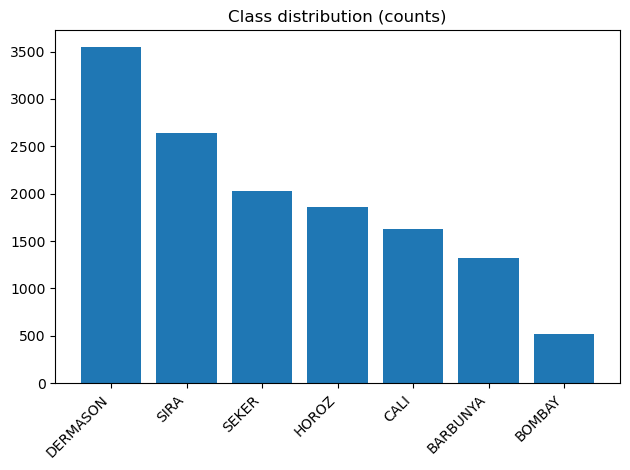

In [35]:
class_counts = y.value_counts()
class_props = y.value_counts(normalize=True)

print("Class counts:\n", class_counts)
print("\nClass proportions:\n", class_props.round(4))

plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.title("Class distribution (counts)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Interpretation: the dataset is imbalanced (e.g., BOMBAY is the smallest class). This supports later use of Stratified split/CV and imbalance-aware metrics (macro-F1, balanced accuracy).

(ii) Skewness screening (to justify power transforms)

In [36]:
skewness = X.skew(numeric_only=True).sort_values(key=lambda s: s.abs(), ascending=False)
display(skewness.to_frame("Skewness"))

SKEW_THRESHOLD = 1.0  # you can also report 0.75 as "moderate-to-strong"
skewed_features = skewness[skewness.abs() > SKEW_THRESHOLD].index.tolist()

print(f"Features with |skew| > {SKEW_THRESHOLD}:")
print(skewed_features)

,Skewness
Area,2.947136
ConvexArea,2.936102
ShapeFactor4,-2.760125
Solidity,-2.546877
MinorAxisLength,2.232013
EquivDiameter,1.947303
Perimeter,1.628018
MajorAxisLength,1.365813
Eccentricity,-1.064932
Extent,-0.895655


Features with |skew| > 1.0:
['Area', 'ConvexArea', 'ShapeFactor4', 'Solidity', 'MinorAxisLength', 'EquivDiameter', 'Perimeter', 'MajorAxisLength', 'Eccentricity']


(iii) Histograms for all features (compact grid)

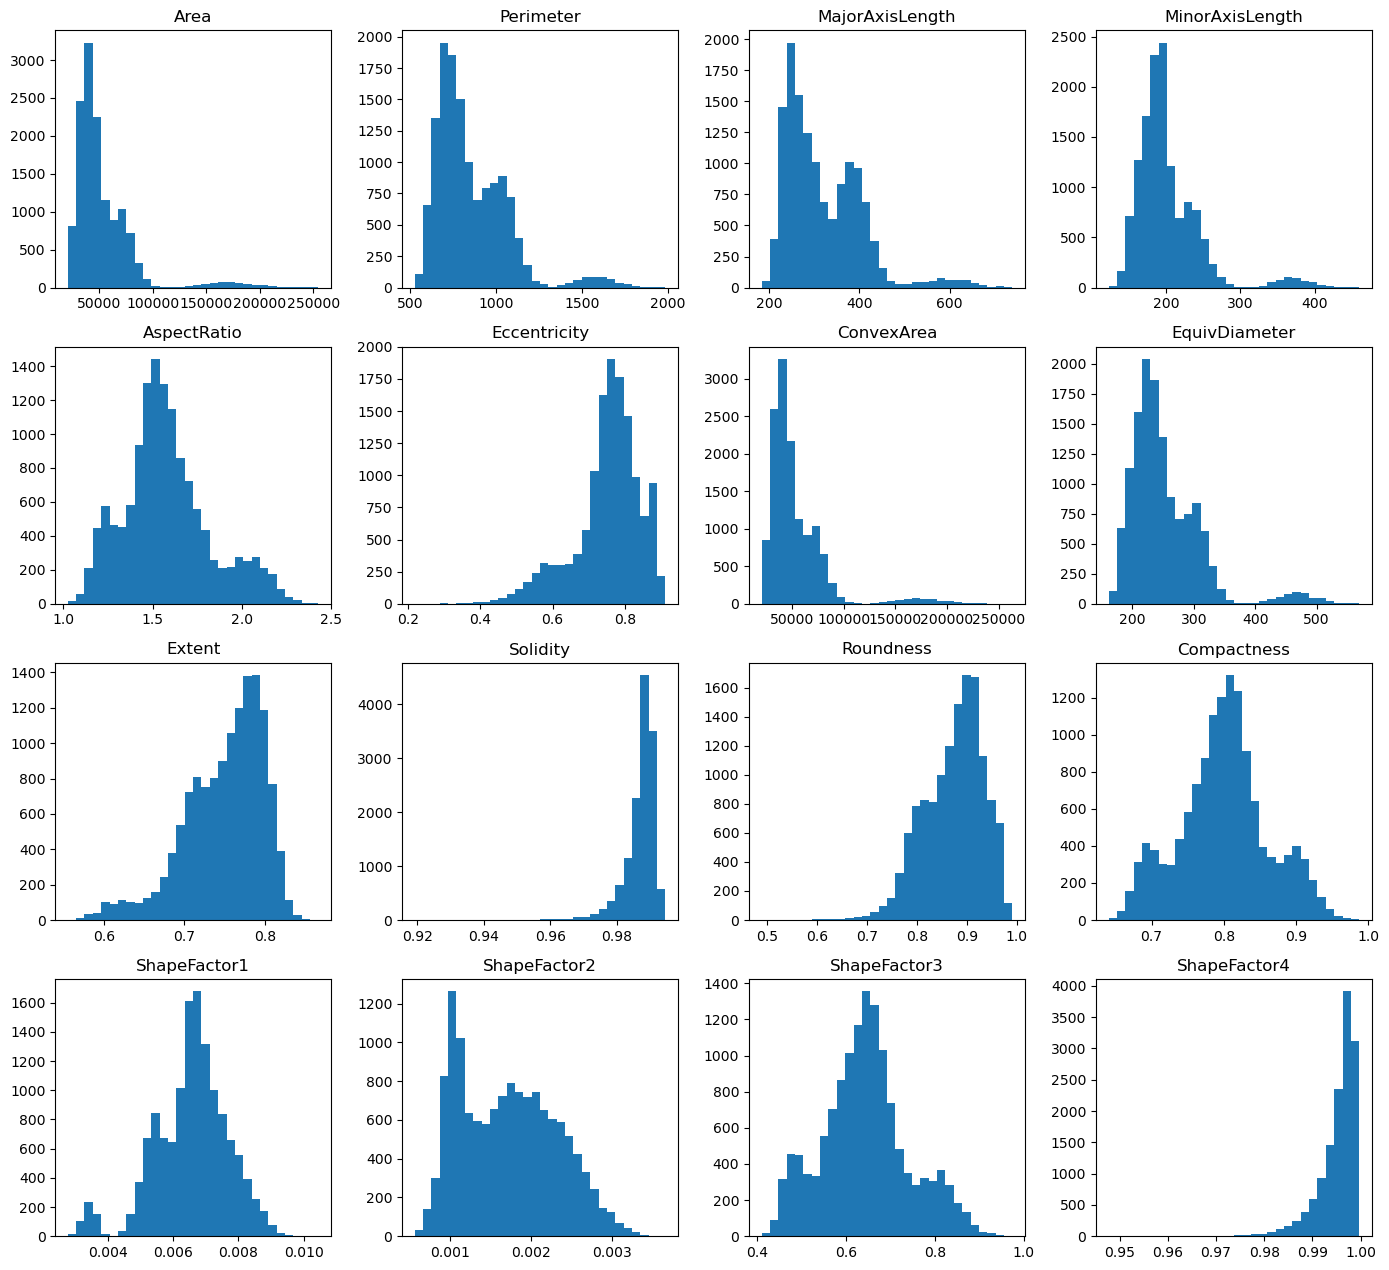

In [37]:
n_cols = 4
n_rows = int(np.ceil(X.shape[1] / n_cols))

plt.figure(figsize=(14, 3.2 * n_rows))
for i, col in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(X[col].values, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

(iv) Boxplots (selected variables, ideally by class)

<Figure size 640x480 with 0 Axes>

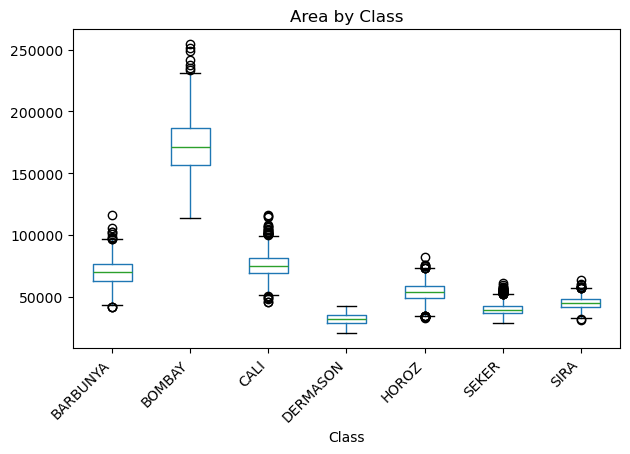

<Figure size 640x480 with 0 Axes>

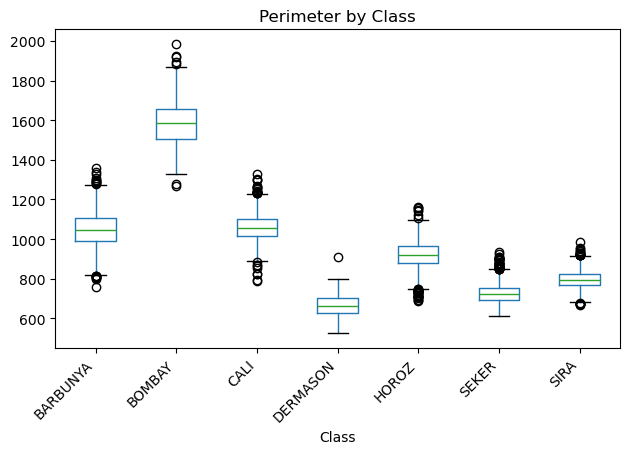

<Figure size 640x480 with 0 Axes>

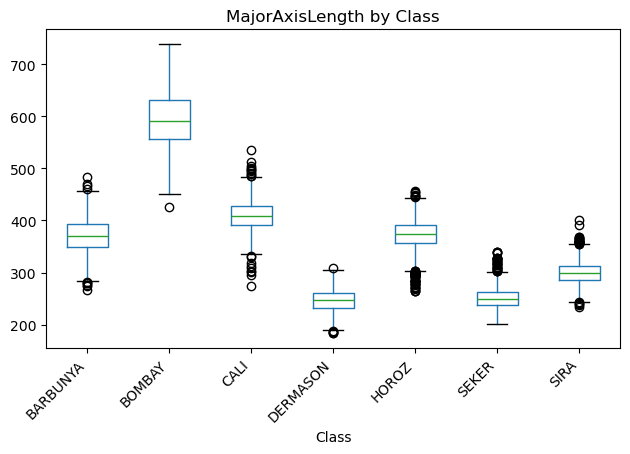

<Figure size 640x480 with 0 Axes>

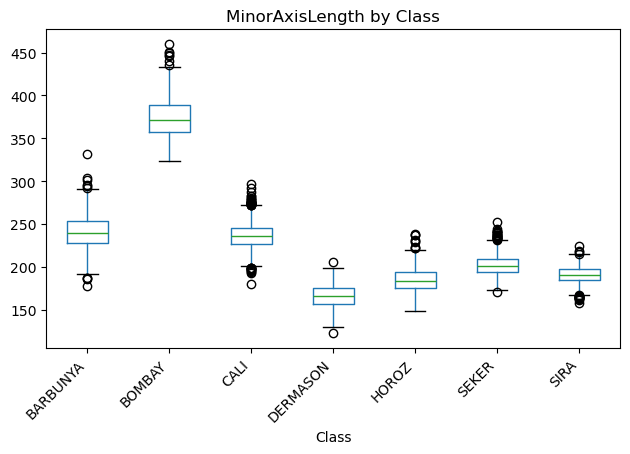

<Figure size 640x480 with 0 Axes>

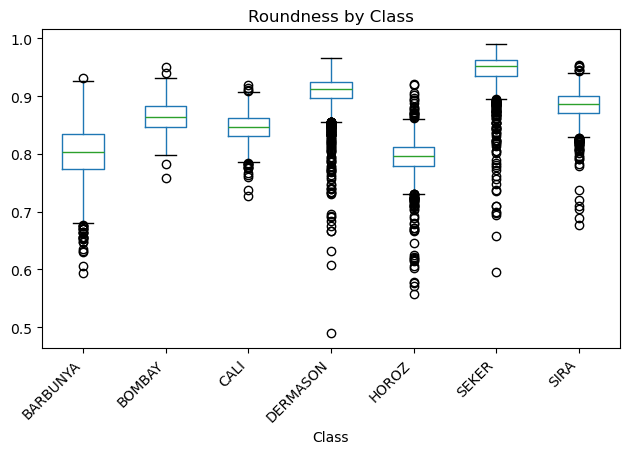

<Figure size 640x480 with 0 Axes>

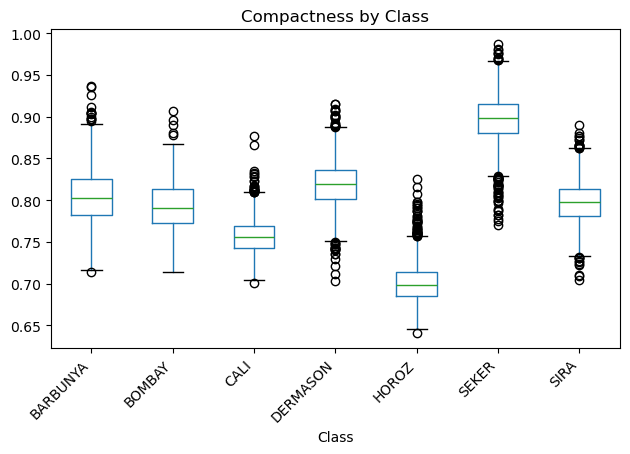

In [38]:
core_vars = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "Roundness", "Compactness"]
core_vars = [v for v in core_vars if v in df.columns]

for v in core_vars:
    plt.figure()
    df.boxplot(column=v, by=target_col, grid=False)
    plt.title(f"{v} by Class")
    plt.suptitle("")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

(v) IQR-outlier proportions table

In [39]:
import numpy as np
import pandas as pd

target_col = "Class"
X = df.drop(columns=[target_col]).copy()

for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors="coerce")

rows = []
for col in X.columns:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_mask = (X[col] < lower) | (X[col] > upper)
    rows.append({
        "feature": col,
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_count": int(outlier_mask.sum()),
        "outlier_prop": float(outlier_mask.mean())
    })

iqr_outliers = pd.DataFrame(rows).sort_values("outlier_prop", ascending=False)
display(iqr_outliers)

,feature,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count,outlier_prop
5,Eccentricity,0.715144,0.809671,0.094528,0.573352,0.951463,833,0.061508
9,Solidity,0.985678,0.990019,0.004340,0.979168,0.996529,774,0.057151
15,ShapeFactor4,0.993720,0.997891,0.004171,0.987463,1.004149,760,0.056118
3,MinorAxisLength,175.886357,217.245403,41.359046,113.847788,279.283973,567,0.041867
0,Area,36282.500000,61382.000000,25099.500000,-1366.750000,99031.250000,551,0.040685
6,ConvexArea,36673.000000,62360.000000,25687.000000,-1857.500000,100890.500000,549,0.040538
12,ShapeFactor1,0.005893,0.007270,0.001377,0.003827,0.009336,533,0.039356
7,EquivDiameter,214.933277,279.560351,64.627073,117.992667,376.500961,526,0.038839
1,Perimeter,703.230000,977.146500,273.916500,292.355250,1388.021250,500,0.036919
4,AspectRatio,1.430662,1.703916,0.273254,1.020780,2.113797,485,0.035812


Interpretation

Several variables have ~4–6% of observations flagged as outliers under the IQR rule. That is not “rare noise”; it is a meaningful tail mass.

Some are bounded/ratio-like (Solidity, ShapeFactor4, Eccentricity), which often produce concentrated distributions plus tail behavior.

Several are size-related (Area, ConvexArea, MinorAxisLength), where right tails are common.

Outlier handling

In [40]:
# ============================================================
# IQR-based outlier IMPUTATION (replace outliers, no clipping)
# ============================================================

# Ensure numeric columns are float (avoid dtype issues during imputation)
X = X.astype(float)
#Outlier treatment

for col in X.columns:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Masks
    low_mask = X[col] < lower
    high_mask = X[col] > upper

    # Imputation
    X.loc[low_mask, col] = q1
    X.loc[high_mask, col] = q3

In [41]:
# ============================================================
# Update df with the corrected features from X
# (only overwrite feature columns, keep Class unchanged)
# ============================================================
df.loc[X.index, X.columns] = X

import numpy as np
import pandas as pd

target_col = "Class"
X = df.drop(columns=[target_col]).copy()

for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors="coerce")

rows = []
for col in X.columns:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_mask = (X[col] < lower) | (X[col] > upper)
    rows.append({
        "feature": col,
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_count": int(outlier_mask.sum()),
        "outlier_prop": float(outlier_mask.mean())
    })

iqr_outliers = pd.DataFrame(rows).sort_values("outlier_prop", ascending=False)
display(iqr_outliers)

,feature,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count,outlier_prop
14,ShapeFactor3,0.582521,0.696328,0.113807,0.411811,0.867038,1,0.000074
0,Area,36282.500000,61379.500000,25097.000000,-1363.000000,99025.000000,0,0.000000
1,Perimeter,703.230000,977.117750,273.887750,292.398375,1387.949375,0,0.000000
2,MajorAxisLength,253.086806,376.305358,123.218552,68.258978,561.133186,0,0.000000
3,MinorAxisLength,175.886357,217.241605,41.355247,113.853486,279.274476,0,0.000000
4,AspectRatio,1.430662,1.703904,0.273242,1.020799,2.113767,0,0.000000
5,Eccentricity,0.715144,0.809671,0.094527,0.573354,0.951462,0,0.000000
6,ConvexArea,36673.000000,62355.500000,25682.500000,-1850.750000,100879.250000,0,0.000000
7,EquivDiameter,214.933277,279.554658,64.621380,118.001206,376.486728,0,0.000000
8,Extent,0.718738,0.786849,0.068111,0.616572,0.889015,0,0.000000


### 2.3 Multivariate analysis

(i) Correlation matrix (Pearson)

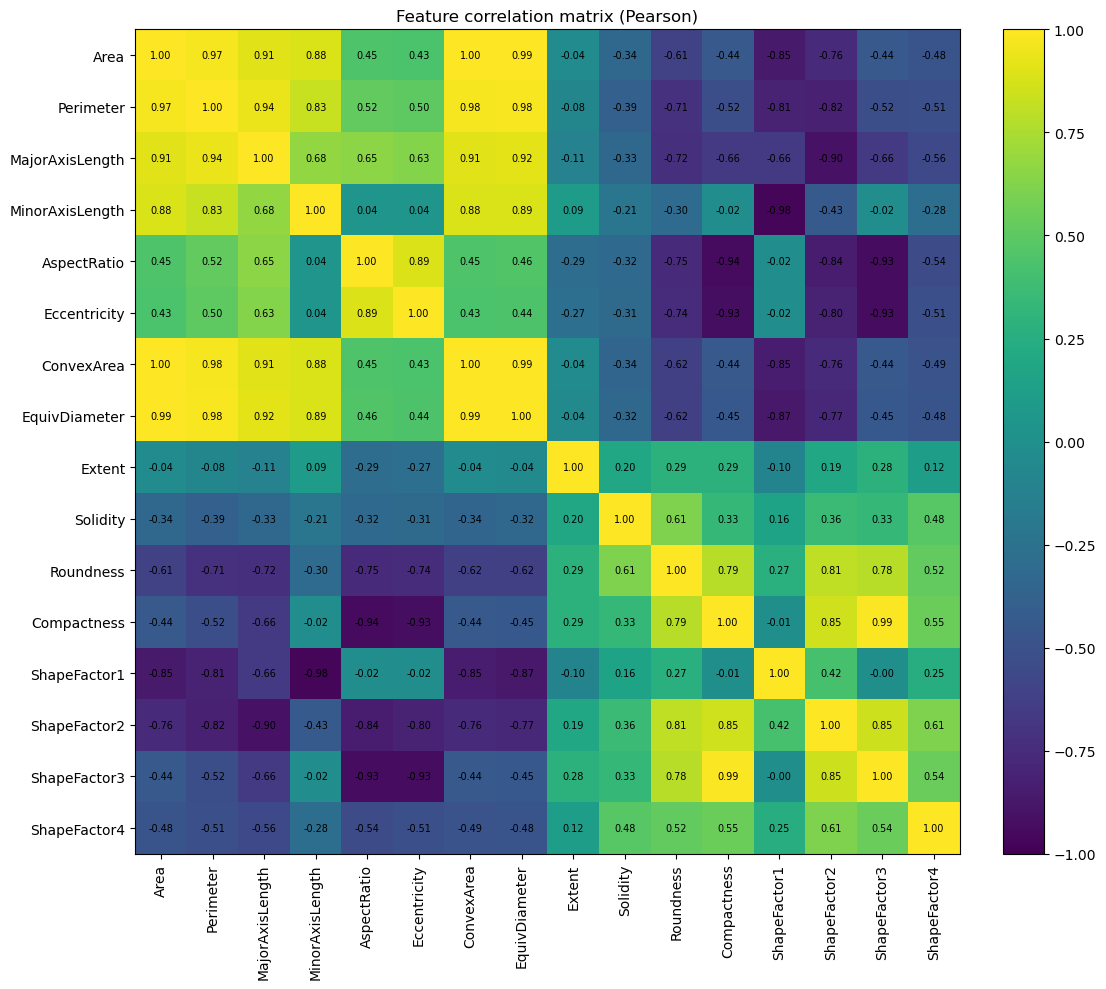

In [42]:
import numpy as np
import matplotlib.pyplot as plt

corr = X.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr.values, vmin=-1, vmax=1)

ax.set_title("Feature correlation matrix (Pearson)")
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Write correlation values in each cell
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center", fontsize=7)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

(ii) Most correlated pairs (evidence of collinearity)

In [43]:
corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

top_pairs = (
    upper.stack()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)
top_pairs.columns = ["Feature 1", "Feature 2", "|Correlation|"]
display(top_pairs)

,Feature 1,Feature 2,|Correlation|
0,Area,ConvexArea,0.999484
1,ConvexArea,EquivDiameter,0.992434
2,Area,EquivDiameter,0.992406
3,Compactness,ShapeFactor3,0.985029
4,Perimeter,EquivDiameter,0.982233
5,MinorAxisLength,ShapeFactor1,0.976353
6,Perimeter,ConvexArea,0.975971
7,Area,Perimeter,0.974879
8,AspectRatio,Compactness,0.944589
9,Perimeter,MajorAxisLength,0.942018


These are extremely high correlations (many above 0.98), which is strong evidence of multicollinearity / redundancy among predictors.

The most intuitive example is Area vs ConvexArea (0.99994): they are almost the same information in this dataset.

Similarly, Perimeter, EquivDiameter, MajorAxisLength are all “size/geometry” measures, so high correlation is expected.

Implications for modeling (this is the key “why it matters” paragraph):

Linear models (especially unregularized) can become unstable under strong multicollinearity; coefficients can be difficult to interpret and may vary with small changes in data.

Two principled ways to handle this are exactly what you planned:

Regularization (Elastic Net logistic regression): stabilizes learning by shrinking/zeroing coefficients.

PCA: compresses correlated predictors into a smaller set of orthogonal components; given correlations this strong, you should expect a small number of PCs to capture most variance (your earlier “0.95 explained variance gives ~4 components” is consistent with that type of correlation structure).

## PCA on the dataset

,Axis,Eigenvalue (Inertia),Explained Variance Ratio,Cumulative Explained Variance
0,PC1,4.4033,0.5852,0.5852
1,PC2,1.7819,0.2368,0.8221
2,PC3,0.4803,0.0638,0.8859
3,PC4,0.3606,0.0479,0.9338
4,PC5,0.2212,0.0294,0.9632
5,PC6,0.0714,0.0095,0.9727
6,PC7,0.0657,0.0087,0.9814
7,PC8,0.0454,0.0060,0.9875
8,PC9,0.0324,0.0043,0.9918
9,PC10,0.0260,0.0035,0.9952


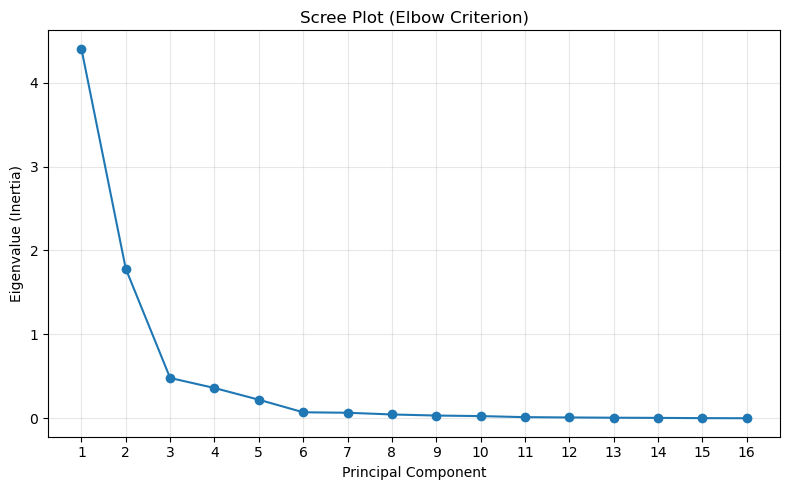

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# ============================================================
# Reproducibility
# ============================================================
RSEED = 42

# ============================================================
# Scaling (PCA is scale-sensitive)
# ============================================================
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# PCA (full PCA, exploratory)
# ============================================================
pca = PCA(random_state=RSEED)
X_pca = pca.fit_transform(X_scaled)

# ============================================================
# PCA quantities
# ============================================================
eigenvalues = pca.explained_variance_                 # Inertia
explained_var_ratio = pca.explained_variance_ratio_  # % variance
cumulative_var = np.cumsum(explained_var_ratio)      # Cumulative inertia

n_components = len(eigenvalues)

# ============================================================
# Table of inertias (scientific summary)
# ============================================================
pca_inertia_table = pd.DataFrame({
    "Axis": [f"PC{i}" for i in range(1, n_components + 1)],
    "Eigenvalue (Inertia)": eigenvalues,
    "Explained Variance Ratio": explained_var_ratio,
    "Cumulative Explained Variance": cumulative_var
})

# Optional: round for readability
pca_inertia_table = pca_inertia_table.round(4)

display(pca_inertia_table)

# ============================================================
# Plot 1: Scree plot (Elbow criterion)
# ============================================================
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), eigenvalues, marker="o")
plt.title("Scree Plot (Elbow Criterion)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue (Inertia)")
plt.xticks(range(1, n_components + 1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The first four components allow more than 97% of the information contained in the database to be retrieved.

## Boxplot: Principal components vs target variable

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# ----------------------------
# 0) Ensure we work on the de-duplicated dataset
# ----------------------------
df = df.drop_duplicates().reset_index(drop=True)
print("Dataset shape after drop_duplicates:", df.shape)

# ----------------------------
# 1) Separate features/target
# ----------------------------
target_col = "Class"
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

# Ensure numeric features (robust to any parsing issues)
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors="coerce")

# ----------------------------
# 2) Stratified 70/30 split
# ----------------------------
RSEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=RSEED
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

# ----------------------------
# 3) Verify class proportions are preserved
# ----------------------------
train_props = y_train.value_counts(normalize=True).sort_index()
test_props  = y_test.value_counts(normalize=True).sort_index()

prop_check = pd.DataFrame({"train_prop": train_props, "test_prop": test_props}).fillna(0)
prop_check["abs_diff"] = (prop_check["train_prop"] - prop_check["test_prop"]).abs()

print("\nClass proportions (train vs test):")
print(prop_check.sort_values("abs_diff", ascending=False))

# Optional: counts table
counts_check = pd.DataFrame({
    "train_count": y_train.value_counts().sort_index(),
    "test_count": y_test.value_counts().sort_index()
}).fillna(0).astype(int)

print("\nClass counts (train vs test):")
print(counts_check)

Dataset shape after drop_duplicates: (13543, 17)
Train shape: (9480, 16) | Test shape: (4063, 16)

Class proportions (train vs test):
          train_prop  test_prop  abs_diff
Class                                    
BOMBAY      0.038608   0.038395  0.000212
BARBUNYA    0.097574   0.097711  0.000137
SIRA        0.194620   0.194684  0.000063
DERMASON    0.261814   0.261875  0.000061
SEKER       0.149684   0.149643  0.000040
HOROZ       0.137342   0.137337  0.000005
CALI        0.120359   0.120354  0.000004

Class counts (train vs test):
          train_count  test_count
Class                            
BARBUNYA          925         397
BOMBAY            366         156
CALI             1141         489
DERMASON         2482        1064
HOROZ            1302         558
SEKER            1419         608
SIRA             1845         791


In [46]:
# ============================
# BACKUP : données originales
# ============================
X_train_raw = X_train.copy()
X_test_raw  = X_test.copy()
y_train_raw = y_train.copy()
y_test_raw  = y_test.copy()

print("Backup OK:", X_train_raw.shape, X_test_raw.shape)

Backup OK: (9480, 16) (4063, 16)


In [47]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# (Optionnel mais conseillé) garder une copie des labels texte
y_train_str = y_train.copy()
y_test_str  = y_test.copy()

# Encodage EN PLACE (tu gardes les mêmes noms y_train / y_test)
le = LabelEncoder()
y_train = le.fit_transform(y_train)   # devient 0..6
y_test  = le.transform(y_test)

class_names = le.classes_
print("Class mapping:", dict(zip(class_names, range(len(class_names)))))

Class mapping: {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


### 4.3 Class imbalance (SMOTE within CV)

In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold

RSEED = 42

# Stratified CV (k=5)
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)

# SMOTE (oversampling) — MUST be applied inside CV folds via the pipeline
smote = SMOTE(random_state=RSEED)

def make_pipeline_with_smote(model, preprocess_steps=None):
    """
    model: any sklearn classifier
    preprocess_steps: list of ("name", transformer) steps, e.g.
        [("power", power_boxcox_selective), ("scaler", scaler)]
    If preprocess_steps is None, the pipeline will include only SMOTE + model.
    """
    steps = []
    if preprocess_steps is not None:
        steps.extend(preprocess_steps)

    steps.append(("smote", smote))
    steps.append(("model", model))

    return ImbPipeline(steps)

Before SMOTE:
 Class
0     925
1     366
2    1141
3    2482
4    1302
5    1419
6    1845
Name: count, dtype: int64

After SMOTE:
 Class
0    2482
1    2482
2    2482
3    2482
4    2482
5    2482
6    2482
Name: count, dtype: int64

Synthetic samples created: 7894


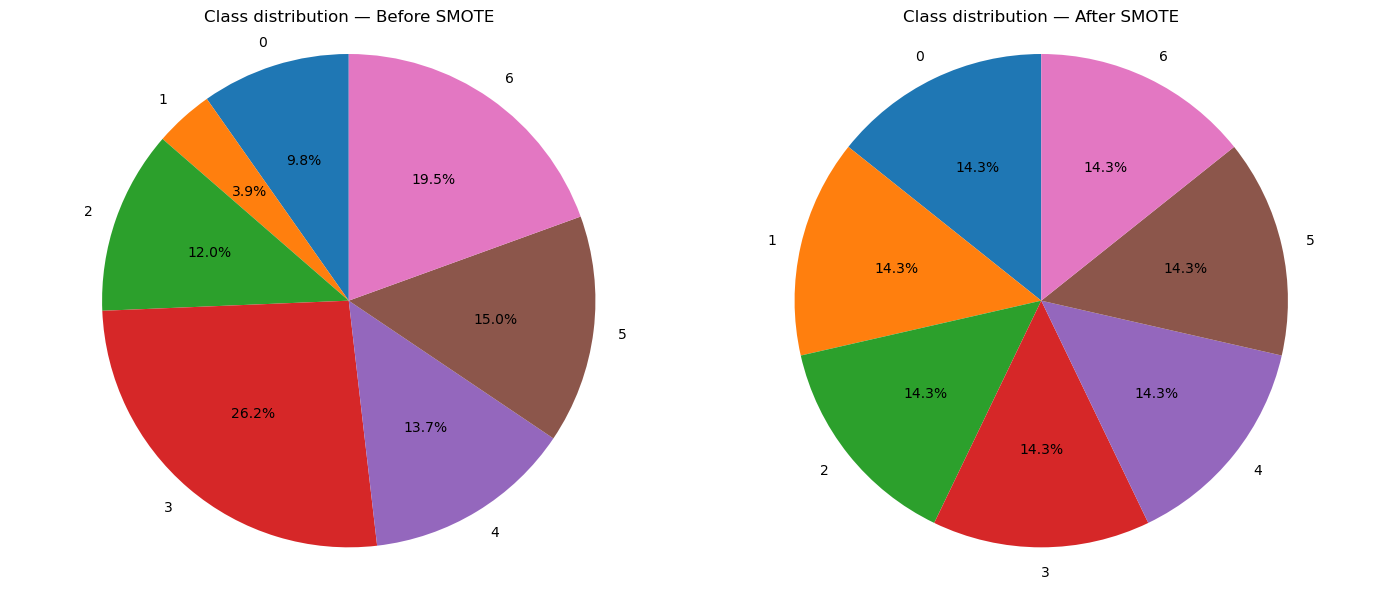

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

RSEED = 42
smote = SMOTE(random_state=RSEED)

# -------------------------------------------------
# Ensure y_train is a pandas Series
# -------------------------------------------------
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name="Class")

# ----------------------------
# 1) Before SMOTE
# ----------------------------
counts_before = y_train.value_counts().sort_index()

# ----------------------------
# 2) Apply SMOTE (TRAIN ONLY)
# ----------------------------
X_res, y_res = smote.fit_resample(X_train, y_train)

# Ensure y_res is also a pandas Series
y_res = pd.Series(y_res, name="Class")

counts_after = y_res.value_counts().sort_index()

print("Before SMOTE:\n", counts_before)
print("\nAfter SMOTE:\n", counts_after)
print("\nSynthetic samples created:", len(y_res) - len(y_train))

# ----------------------------
# 3) Pie charts
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    counts_before.values,
    labels=counts_before.index,
    autopct="%.1f%%",
    startangle=90
)
axes[0].set_title("Class distribution — Before SMOTE")
axes[0].axis("equal")

axes[1].pie(
    counts_after.values,
    labels=counts_after.index,
    autopct="%.1f%%",
    startangle=90
)
axes[1].set_title("Class distribution — After SMOTE")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

Interpretation:

After SMOTE, each class count should be increased to match the majority class (by default), or at least increased according to the sampling strategy.

## Models 

## Modeling pipeline and hyperparameter tuning

This notebook benchmarks several multiclass classifiers on the Dry Bean dataset under a unified preprocessing and training framework. The goal is to compare (i) learning algorithms (non-linear vs linear), (ii) the impact of class rebalancing (SMOTE), and (iii) the effect of dimensionality reduction (PCA) on out-of-sample performance.

---

### 1) Data formatting and label encoding

Before training, we ensure that the feature matrices are strictly numeric:

- `X_train` and `X_test` are converted to `float` arrays to avoid numerical issues (especially for MLP solvers).
- The target labels are encoded into integers using `LabelEncoder`:
  - this is required by many scikit-learn estimators,
  - it also allows consistent computation of metrics and confusion matrices.
- The original class names are stored in `class_names` for interpretation and visualization.

---

### 2) Pipeline architecture (RobustScaler → SMOTE → PCA → Model)

All models are trained using an **imblearn Pipeline**, ensuring that preprocessing is learned **only on the training folds** during cross-validation (no leakage).

Each experiment follows the same structure:

1. **RobustScaler**  
   Scales features using the median and IQR, making the preprocessing less sensitive to outliers than standard scaling.

2. **SMOTE (optional)**  
   Oversamples minority classes by generating synthetic samples (used to reduce class imbalance).

3. **PCA (optional)**  
   Applies Principal Component Analysis to compress the feature space.  
   We compare:
   - `NoPCA` (original feature space),
   - `PCA(k=2)`, `PCA(k=3)`, `PCA(k=4)`, `PCA(k=5)`.

✅ Important: **SMOTE is applied before PCA** so that synthetic samples are generated in the original feature space, where neighborhood relationships remain meaningful.

---

### 3) Candidate models

We evaluate three representative classifiers:

#### (a) SVM with RBF kernel (SVM_RBF)
A strong non-linear model that can capture complex class boundaries.
Hyperparameters tuned:
- `C` (regularization strength)
- `gamma` (kernel width)

For speed, `probability=False` is used.

#### (b) Multi-Layer Perceptron (MLP)
A feedforward neural network trained with Adam.
Early stopping is enabled to improve stability and reduce overfitting.
Hyperparameters tuned:
- `hidden_layer_sizes` (architecture)
- `alpha` (L2 regularization)
- `learning_rate_init`

#### (c) Logistic Regression (Logit)
A linear baseline model trained with `lbfgs`, controlled by regularization parameter `C`.  
Here, logistic regression is evaluated **only with PCA feature representations** (NoPCA excluded) to stabilize estimation under multicollinearity.

---

### 4) Hyperparameter tuning and model selection

For each model and each preprocessing configuration (PCA × SMOTE), we run a **GridSearchCV** using:

- **Stratified 5-fold cross-validation**  
  Preserves class proportions within folds, which is crucial under class imbalance.

- **Macro-F1 scoring (`f1_macro`)** as the optimization criterion  
  Macro-F1 gives equal weight to each class by averaging per-class F1 scores, making it more informative than accuracy in imbalanced multiclass classification.

---

### 5) Final evaluation on the test set

For each fitted configuration, we evaluate the selected best estimator on a held-out test set using:

- Accuracy
- Balanced accuracy
- Macro-F1

We also report the number of effective features used:
- full original dimension under `NoPCA`,
- `k` components under PCA settings.

This allows us to assess the trade-off between **predictive performance** and **feature compression**.


In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# ============================================================
# 0) CONFIG
# ============================================================
RSEED = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)

SCORING = "f1_macro"

# PCA configs (NoPCA + k=2,3,4,5)
PCA_CONFIGS = [
    {"name": "NoPCA", "use_pca": False, "k": None},
    {"name": "PCA(k=2)", "use_pca": True, "k": 2},
    {"name": "PCA(k=3)", "use_pca": True, "k": 3},
    {"name": "PCA(k=4)", "use_pca": True, "k": 4},
    {"name": "PCA(k=5)", "use_pca": True, "k": 5},
]

# Compare OFF vs ON
SMOTE_LIST = [False, True]

# Logistic: PCA only (comme avant)
LOGIT_ALLOW_NOPCA = False


# ============================================================
# IMPORTANT FIX (MLP error): ensure X numeric + y encoded
# ============================================================
# If X_train/X_test are pandas DataFrames, this keeps values but forces float dtype
X_train = np.asarray(X_train, dtype=float)
X_test  = np.asarray(X_test, dtype=float)

# Encode string labels -> integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

# Optionnel : garder les noms des classes (utile pour confusion matrices)
class_names = le.classes_
print("Classes:", class_names)


# ============================================================
# 1) EVALUATION (TEST)
# ============================================================
def evaluate_on_test(best_estimator, X_test, y_test):
    y_pred = best_estimator.predict(X_test)
    return {
        "test_accuracy": accuracy_score(y_test, y_pred),
        "test_balanced_accuracy": balanced_accuracy_score(y_test, y_pred),
        "test_macro_f1": f1_score(y_test, y_pred, average="macro"),
    }


# ============================================================
# 2) PIPELINE FACTORY (Scaler -> SMOTE -> PCA -> Model)
# ============================================================
def make_pipeline(model, use_pca=False, k=None, use_smote=False):
    steps = [("scaler", RobustScaler())]

    # SMOTE before PCA
    if use_smote:
        steps.append(("smote", SMOTE(random_state=RSEED)))

    if use_pca:
        steps.append(("pca", PCA(n_components=k, random_state=RSEED)))

    steps.append(("model", model))
    return Pipeline(steps)


# ============================================================
# 3) MODELS + GRIDS
# ============================================================
# --- SVM (probability=False for speed)
svm = SVC(kernel="rbf", random_state=RSEED, probability=False)
grid_svm = {
    "model__C": [0.1, 1, 10, 100],
    "model__gamma": ["scale", 0.01, 0.1, 1],
}

# --- MLP with early stopping
mlp = MLPClassifier(
    max_iter=2000,
    random_state=RSEED,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    solver="adam"
)
grid_mlp = {
    "model__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "model__alpha": [1e-4, 1e-3, 1e-2],
    "model__learning_rate_init": [1e-3, 1e-2],
}

# --- Logistic Regression (no multi_class)
logit = LogisticRegression(
    solver="lbfgs",
    max_iter=5000,
    random_state=RSEED
)
grid_logit = {"model__C": [0.1, 1, 10, 100]}


# ============================================================
# 4) RUNNER
# ============================================================
def run_model(model_name, base_model, param_grid, allow_no_pca=True):
    rows = []

    for use_smote in SMOTE_LIST:
        for cfg in PCA_CONFIGS:

            # skip NoPCA if not allowed
            if (cfg["name"] == "NoPCA") and (not allow_no_pca):
                continue

            pipe = make_pipeline(
                base_model,
                use_pca=cfg["use_pca"],
                k=cfg["k"],
                use_smote=use_smote
            )

            gs = GridSearchCV(
                estimator=pipe,
                param_grid=param_grid,
                cv=cv,
                scoring=SCORING,
                n_jobs=-1,
                refit=True,
                verbose=0
            )

            gs.fit(X_train, y_train)

            best_est = gs.best_estimator_

            row = {
                "model": model_name,
                "setting": cfg["name"],
                "smote": use_smote,
                "cv_best_f1_macro": gs.best_score_,
                "best_params": gs.best_params_,
                "n_features_used": (X_train.shape[1] if not cfg["use_pca"] else cfg["k"]),
            }
            row.update(evaluate_on_test(best_est, X_test, y_test))
            rows.append(row)

    return rows


# ============================================================
# 5) EXECUTE
# ============================================================
all_rows = []
all_rows += run_model("SVM_RBF", svm, grid_svm, allow_no_pca=True)
all_rows += run_model("MLP", mlp, grid_mlp, allow_no_pca=True)
all_rows += run_model("Logit", logit, grid_logit, allow_no_pca=LOGIT_ALLOW_NOPCA)

results_df = pd.DataFrame(all_rows)

results_df = results_df.sort_values(
    by=["model", "test_macro_f1"],
    ascending=[True, False]
).reset_index(drop=True)

results_df

Classes: [0 1 2 3 4 5 6]


,model,setting,smote,cv_best_f1_macro,best_params,n_features_used,test_accuracy,test_balanced_accuracy,test_macro_f1
0,Logit,PCA(k=5),True,0.868099,{'model__C': 1},5,0.888752,0.880410,0.871477
1,Logit,PCA(k=5),False,0.853396,{'model__C': 100},5,0.889983,0.854608,0.862674
2,Logit,PCA(k=4),True,0.839023,{'model__C': 10},4,0.868078,0.850910,0.839500
3,Logit,PCA(k=3),True,0.822578,{'model__C': 100},3,0.859217,0.834132,0.823338
4,Logit,PCA(k=4),False,0.808274,{'model__C': 100},4,0.865617,0.809633,0.817195
5,Logit,PCA(k=3),False,0.794808,{'model__C': 1},3,0.857741,0.788688,0.794940
6,Logit,PCA(k=2),True,0.787982,{'model__C': 0.1},2,0.837558,0.796989,0.783640
7,Logit,PCA(k=2),False,0.716686,{'model__C': 100},2,0.832390,0.727028,0.713887
8,MLP,NoPCA,True,0.939655,"{'model__alpha': 0.0001, 'model__hidden_layer_...",16,0.920010,0.933198,0.932815
9,MLP,NoPCA,False,0.939459,"{'model__alpha': 0.0001, 'model__hidden_layer_...",16,0.920994,0.928724,0.931887


### ROC Curve and AUC

     model   setting  smote  test_macro_f1  \
0    Logit  PCA(k=5)   True       0.871477   
1      MLP     NoPCA   True       0.932815   
2  SVM_RBF     NoPCA  False       0.936946   

                                         best_params  
0                                    {'model__C': 1}  
1  {'model__alpha': 0.0001, 'model__hidden_layer_...  
2          {'model__C': 10, 'model__gamma': 'scale'}  


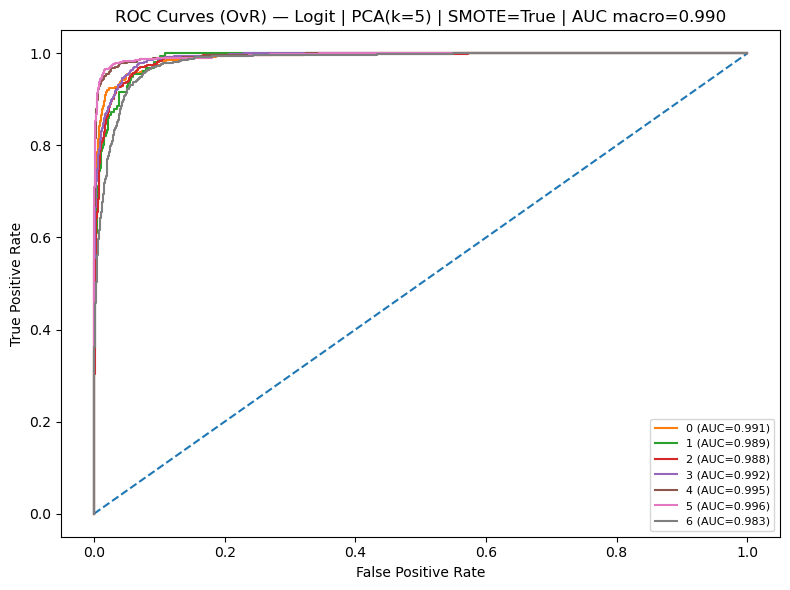

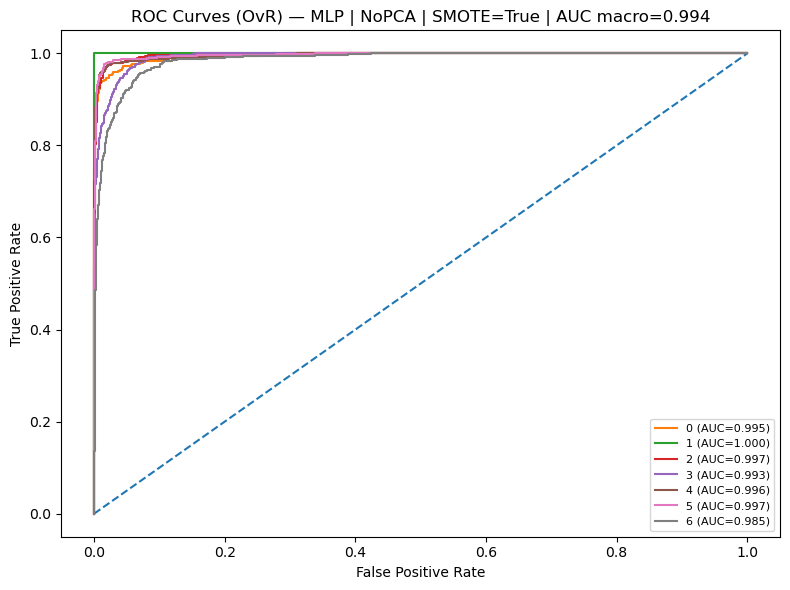

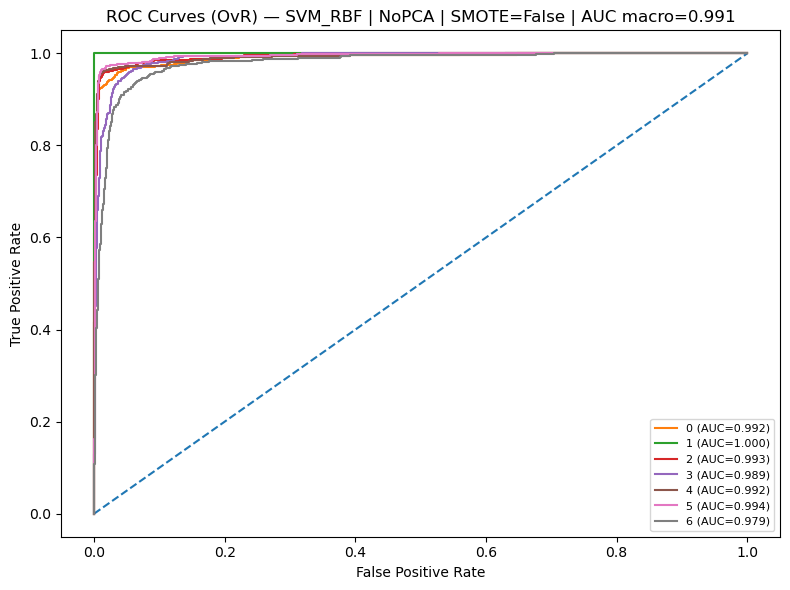

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score


# ============================================================
# 1) Sélection : meilleure config par modèle (selon test_macro_f1)
# ============================================================
best_df = results_df.loc[
    results_df.groupby("model")["test_macro_f1"].idxmax()
].copy().reset_index(drop=True)

print(best_df[["model", "setting", "smote", "test_macro_f1", "best_params"]])


# ============================================================
# 2) Base models (identiques à ton entraînement initial)
# ============================================================
base_models = {
    "SVM_RBF": svm,
    "MLP": mlp,
    "Logit": logit
}


# ============================================================
# 3) Rebuild + refit uniquement les meilleurs modèles
# ============================================================
def rebuild_best_pipeline(row):
    model_name = row["model"]
    setting = row["setting"]
    smote_on = bool(row["smote"])

    # PCA parsing
    if setting == "NoPCA":
        use_pca = False
        k = None
    else:
        use_pca = True
        k = int(setting.split("k=")[1].replace(")", ""))

    pipe = make_pipeline(
        model=clone(base_models[model_name]),
        use_pca=use_pca,
        k=k,
        use_smote=smote_on
    )

    pipe.set_params(**row["best_params"])
    return pipe


best_models = {}

for _, row in best_df.iterrows():
    name = row["model"]
    pipe = rebuild_best_pipeline(row)

    # Refit (rapide)
    pipe.fit(X_train, y_train)

    best_models[name] = {
        "estimator": pipe,
        "setting": row["setting"],
        "smote": row["smote"]
    }


# ============================================================
# 4) Fonction : scores pour ROC (proba ou decision_function)
# ============================================================
def get_score_matrix(estimator, X):
    """
    Retourne une matrice (n_samples, n_classes) :
    - predict_proba si dispo
    - sinon decision_function (SVM)
    """
    if hasattr(estimator, "predict_proba"):
        scores = estimator.predict_proba(X)
    elif hasattr(estimator, "decision_function"):
        scores = estimator.decision_function(X)
        # cas binaire -> transformer en (n_samples, 2)
        if scores.ndim == 1:
            scores = np.vstack([-scores, scores]).T
    else:
        raise ValueError("Model has neither predict_proba nor decision_function.")

    return scores


# ============================================================
# 5) Courbes ROC multiclass OvR (une figure par modèle)
# ============================================================
def plot_multiclass_roc_ovr(model_name, estimator, X_test, y_test, class_names):
    """
    Trace ROC OvR + AUC par classe + AUC macro.
    """
    n_classes = len(class_names)

    # scores (n_samples, n_classes)
    y_score = get_score_matrix(estimator, X_test)

    # binarisation y (one-vs-rest)
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # ROC par classe
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # AUC macro OvR
    auc_macro = roc_auc_score(
        y_test_bin, y_score, average="macro", multi_class="ovr"
    )

    # Plot
    plt.figure(figsize=(8, 6))

    # Courbe diagonale (random)
    plt.plot([0, 1], [0, 1], linestyle="--")

    # Une courbe par classe
    for i in range(n_classes):
        plt.plot(
            fpr[i], tpr[i],
            label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})"
        )

    plt.title(f"ROC Curves (OvR) — {model_name} | AUC macro={auc_macro:.3f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()


# ============================================================
# 6) Exécution : ROC pour SVM, MLP, Logit (meilleures configs)
# ============================================================
for name, info in best_models.items():
    plot_multiclass_roc_ovr(
        model_name=f"{name} | {info['setting']} | SMOTE={info['smote']}",
        estimator=info["estimator"],
        X_test=X_test,
        y_test=y_test,
        class_names=class_names
    )

### Confusion Matrices

Best configuration per model:


,model,setting,smote,test_macro_f1,best_params
0,Logit,PCA(k=5),True,0.871477,{'model__C': 1}
1,MLP,NoPCA,True,0.932815,"{'model__alpha': 0.0001, 'model__hidden_layer_..."
2,SVM_RBF,NoPCA,False,0.936946,"{'model__C': 10, 'model__gamma': 'scale'}"


<Figure size 800x600 with 0 Axes>

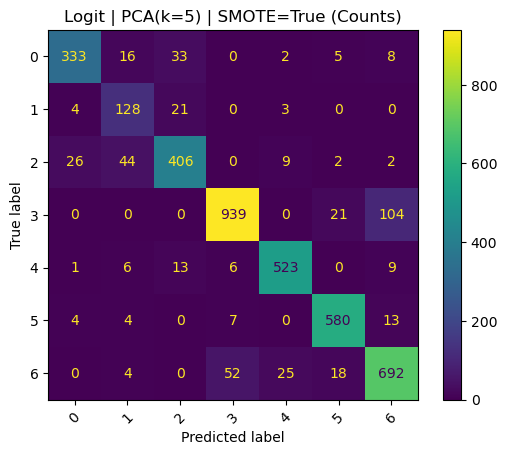

<Figure size 800x600 with 0 Axes>

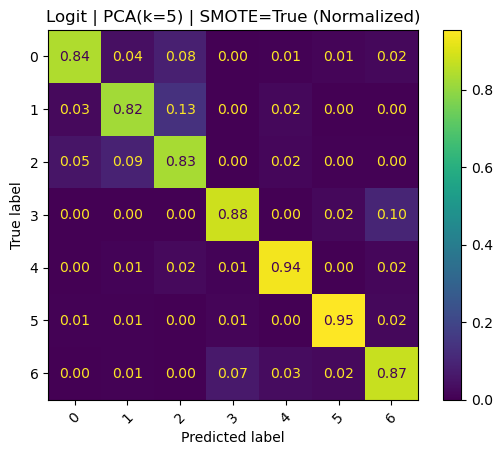

<Figure size 800x600 with 0 Axes>

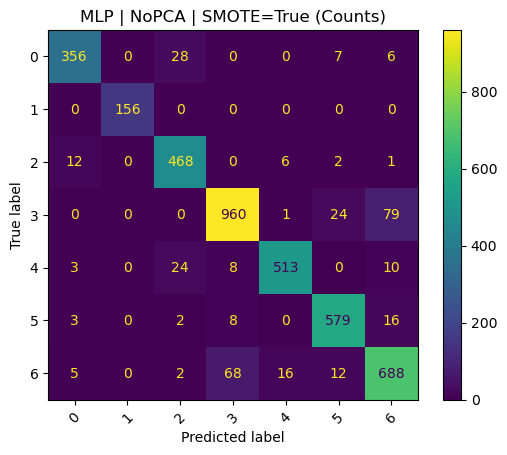

<Figure size 800x600 with 0 Axes>

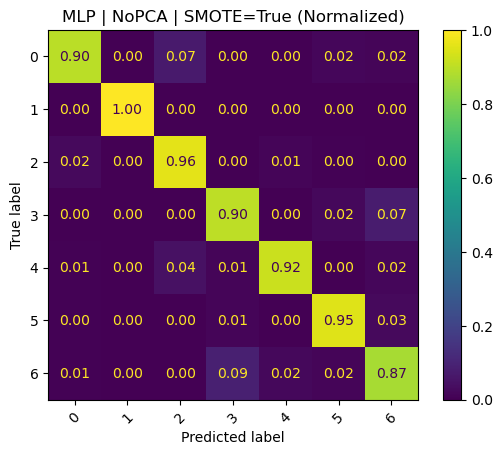

<Figure size 800x600 with 0 Axes>

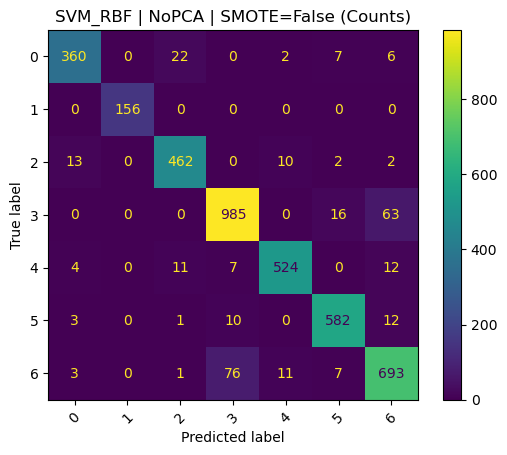

<Figure size 800x600 with 0 Axes>

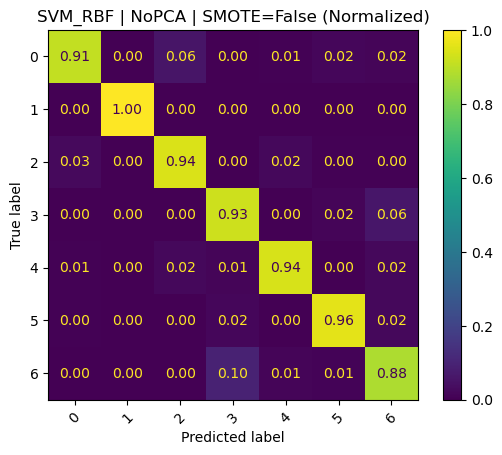

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# ============================================================
# 1) Helpers : reconstruire le bon pipeline à partir de results_df
# ============================================================
def parse_setting(setting_str):
    # "NoPCA" ou "PCA(k=4)" / "PCA(k=5)"
    if setting_str == "NoPCA":
        return False, None
    if setting_str.startswith("PCA"):
        k = int(setting_str.split("k=")[1].replace(")", ""))
        return True, k
    raise ValueError(f"Unknown setting: {setting_str}")


def base_model_from_name(model_name, random_state=42):
    if model_name == "SVM_RBF":
        return SVC(kernel="rbf", probability=True, random_state=random_state)
    if model_name == "MLP":
        return MLPClassifier(max_iter=2000, random_state=random_state)
    if model_name == "Logit":
        return LogisticRegression(solver="lbfgs", max_iter=5000)
    raise ValueError(f"Unknown model name: {model_name}")


def build_pipeline(model_name, setting_str, use_smote, random_state=42):
    use_pca, k = parse_setting(setting_str)
    model = base_model_from_name(model_name, random_state=random_state)

    steps = [("scaler", RobustScaler())]

    if use_pca:
        steps.append(("pca", PCA(n_components=k, random_state=random_state)))

    if use_smote:
        steps.append(("smote", SMOTE(random_state=random_state)))

    steps.append(("model", model))
    return Pipeline(steps)


# ============================================================
# 2) Sélection : meilleure config par modèle (selon test_macro_f1)
# ============================================================
best_rows = results_df.loc[results_df.groupby("model")["test_macro_f1"].idxmax()].copy()
best_rows = best_rows.sort_values("model").reset_index(drop=True)

print("Best configuration per model:")
display(best_rows[["model", "setting", "smote", "test_macro_f1", "best_params"]])


# ============================================================
# 3) Fit 1 fois chaque meilleur modèle + confusion matrices
# ============================================================
labels = np.unique(y_test)

for _, r in best_rows.iterrows():
    model_name = r["model"]
    setting = r["setting"]
    use_smote = bool(r["smote"])
    best_params = r["best_params"]

    # Rebuild pipeline
    pipe = build_pipeline(model_name, setting, use_smote, random_state=42)

    # Apply best hyperparameters
    pipe.set_params(**best_params)

    # Fit final (1 fois)
    pipe.fit(X_train, y_train)

    # Predict test
    y_pred = pipe.predict(X_test)

    # Confusion matrices
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_norm = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

    # Plot counts
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(values_format="d", xticks_rotation=45)
    plt.title(f"{model_name} | {setting} | SMOTE={use_smote} (Counts)")
    plt.show()

    # Plot normalized
    plt.figure(figsize=(8, 6))
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labels)
    disp2.plot(values_format=".2f", xticks_rotation=45)
    plt.title(f"{model_name} | {setting} | SMOTE={use_smote} (Normalized)")
    plt.show()

## Elastic Net logistic regression

## Elastic Net Logistic Regression (with / without SMOTE)

This block trains and evaluates an **Elastic Net regularized logistic regression** model for multiclass classification.  
The objective is twofold:

1. **Handle multicollinearity and feature redundancy** through a combined \(L_1/L_2\) penalty (Elastic Net).
2. **Assess the effect of class rebalancing** by comparing results **with and without SMOTE**.

---

### 1) Why Elastic Net?

Elastic Net logistic regression combines:

- **L1 regularization (Lasso)** → encourages sparsity (feature selection),
- **L2 regularization (Ridge)** → stabilizes coefficients under strong correlations.

This makes Elastic Net particularly relevant when predictors are highly correlated (as in morphological measurements), because it can improve stability and generalization while preserving interpretability.

---

### 2) Pipeline architecture (RobustScaler → SMOTE → ElasticNet Logit)

The model is trained using an **imblearn Pipeline**, ensuring that all transformations are learned only from the training folds during cross-validation (no leakage).

For each configuration:

1. **RobustScaler**
   - scales each feature using median and IQR,
   - more robust to outliers than standard scaling.

2. **SMOTE (optional)**
   - applied only when `smote=True`,
   - generates synthetic minority-class samples to mitigate imbalance.

3. **Elastic Net Logistic Regression**
   - implemented with `LogisticRegression(penalty="elasticnet", solver="saga")`,
   - `saga` is required by scikit-learn to support Elastic Net penalties.

✅ We explicitly compare **SMOTE=False vs SMOTE=True** to quantify its impact on a linear classifier.

---

### 3) Hyperparameter tuning (GridSearchCV)

Hyperparameters are tuned via **GridSearchCV** under **stratified 5-fold cross-validation**, using **Macro-F1** as the optimization metric.

The tuning grid includes:

- `C` (inverse regularization strength):  
  smaller `C` → stronger regularization
- `l1_ratio` (Elastic Net mixing parameter):  
  - `l1_ratio = 0` → pure Ridge  
  - `l1_ratio = 1` → pure Lasso  
  - intermediate values → true Elastic Net

This search identifies the best trade-off between sparsity and stability.

---

### 4) Final evaluation on the test set

For each SMOTE configuration, the best model returned by cross-validation is evaluated on the held-out test set using:

- Accuracy
- Balanced accuracy
- Macro-F1

Macro-F1 and balanced accuracy are emphasized because they provide a fairer assessment across classes in the presence of imbalance.

---

### 5) Outputs

The code returns:

- `results_elasticnet`: a summary DataFrame with CV score, best hyperparameters, and test metrics for:
  - ElasticNet + SMOTE=False
  - ElasticNet + SMOTE=True

- `best_models`: a dictionary storing the fitted best estimators for each configuration  
  (useful for confusion matrices and ROC curves later).

In [53]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# ============================================================
# 0) CONFIG
# ============================================================
RSEED = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)

SCORING = "f1_macro"
SMOTE_LIST = [False, True]


# ============================================================
# 1) EVALUATION (TEST)
# ============================================================
def evaluate_on_test(best_estimator, X_test, y_test):
    y_pred = best_estimator.predict(X_test)
    return {
        "test_accuracy": accuracy_score(y_test, y_pred),
        "test_balanced_accuracy": balanced_accuracy_score(y_test, y_pred),
        "test_macro_f1": f1_score(y_test, y_pred, average="macro"),
    }


# ============================================================
# 2) RUN Elastic Net (with/without SMOTE)
# ============================================================
def run_elasticnet(smote=False):
    # ElasticNet Logistic Regression = penalty="elasticnet" + solver="saga"
    model = LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        max_iter=10000,
        n_jobs=-1,
        random_state=RSEED
    )

    steps = [("scaler", RobustScaler())]

    if smote:
        steps.append(("smote", SMOTE(random_state=RSEED)))

    steps.append(("model", model))

    pipe = Pipeline(steps)

    # Hyperparams (C + l1_ratio)
    param_grid = {
        "model__C": [0.01, 0.1, 1, 10],
        "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
    }

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=cv,
        scoring=SCORING,
        n_jobs=-1,
        refit=True,
        verbose=0
    )

    gs.fit(X_train, y_train)

    best_est = gs.best_estimator_
    out = {
        "model": "ElasticNet_Logit",
        "smote": smote,
        "cv_best_f1_macro": gs.best_score_,
        "best_params": gs.best_params_,
    }
    out.update(evaluate_on_test(best_est, X_test, y_test))

    return out, best_est


# ============================================================
# 3) EXECUTE
# ============================================================
rows = []
best_models = {}

for use_smote in SMOTE_LIST:
    row, best_estimator = run_elasticnet(smote=use_smote)
    rows.append(row)
    best_models[("ElasticNet", f"SMOTE={use_smote}")] = best_estimator

results_elasticnet = pd.DataFrame(rows).sort_values(
    by="test_macro_f1", ascending=False
).reset_index(drop=True)

results_elasticnet

C:\Users\K3605\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\K3605\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
C:\Users\K3605\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 inste

,model,smote,cv_best_f1_macro,best_params,test_accuracy,test_balanced_accuracy,test_macro_f1
0,ElasticNet_Logit,True,0.934336,"{'model__C': 10, 'model__l1_ratio': 0.9}",0.919764,0.932551,0.931487
1,ElasticNet_Logit,False,0.937236,"{'model__C': 10, 'model__l1_ratio': 0.9}",0.918287,0.929029,0.929881


### ROC Curve and AUC - Elastic Net Logistic Regression

Classes: [0 1 2 3 4 5 6]


C:\Users\K3605\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\K3605\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
C:\Users\K3605\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 inste

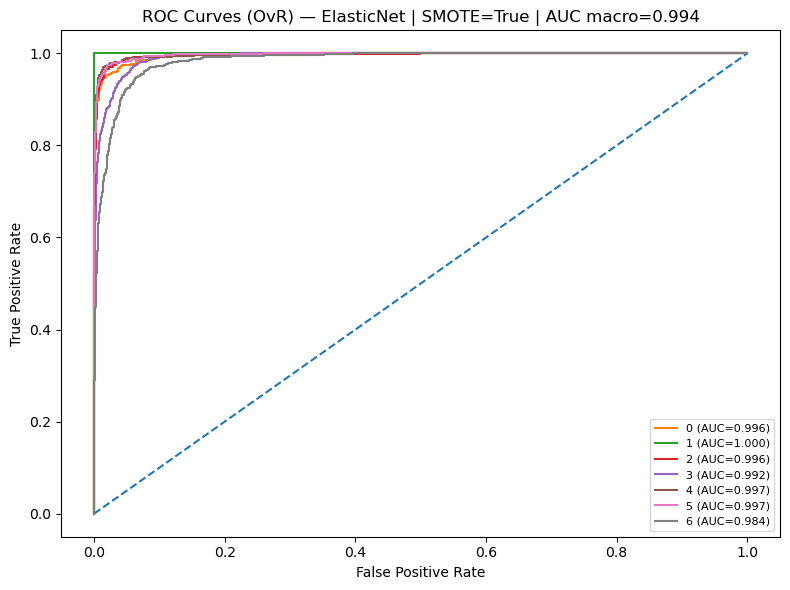

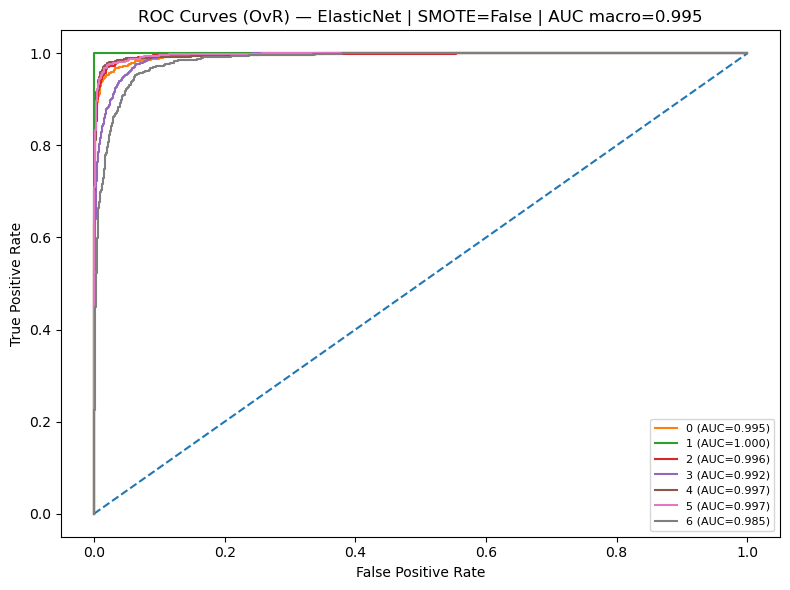

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# ============================================================
# 0) class_names (si dispo, sinon labels numériques)
# ============================================================
if "class_names" not in globals():
    class_names = [str(c) for c in np.unique(y_test)]
    print("Warning: class_names not found -> using numeric labels:", class_names)
else:
    print("Classes:", class_names)


# ============================================================
# 1) Rebuild + Fit ElasticNet à partir de results_elasticnet
# ============================================================
def refit_elasticnet_from_row(row):
    """
    Reconstruit et refit un pipeline ElasticNet selon la ligne row
    (SMOTE ON/OFF + best_params).
    """
    smote_on = bool(row["smote"])

    model = LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        max_iter=10000,
        n_jobs=-1,
        random_state=RSEED
    )

    steps = [("scaler", RobustScaler())]

    if smote_on:
        steps.append(("smote", SMOTE(random_state=RSEED)))

    steps.append(("model", model))

    pipe = Pipeline(steps)

    # appliquer best_params venant du GridSearchCV
    # ex: {"model__C": 10, "model__l1_ratio": 0.9}
    pipe.set_params(**row["best_params"])

    # fit final
    pipe.fit(X_train, y_train)

    return pipe


elasticnet_fitted = {}

for i in range(len(results_elasticnet)):
    row = results_elasticnet.iloc[i]
    title = f"ElasticNet | SMOTE={row['smote']}"

    est = refit_elasticnet_from_row(row)
    elasticnet_fitted[title] = est


# ============================================================
# 2) Fonction ROC multiclass OvR
# ============================================================
def plot_multiclass_roc_ovr(title, estimator, X_test, y_test, class_names):
    n_classes = len(class_names)

    # ElasticNet -> predict_proba OK
    y_score = estimator.predict_proba(X_test)

    # Binarize y
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    auc_macro = roc_auc_score(
        y_test_bin, y_score, average="macro", multi_class="ovr"
    )

    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], linestyle="--")

    for i in range(n_classes):
        plt.plot(
            fpr[i], tpr[i],
            label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})"
        )

    plt.title(f"ROC Curves (OvR) — {title} | AUC macro={auc_macro:.3f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()


# ============================================================
# 3) Tracer les courbes ROC
# ============================================================
for title, est in elasticnet_fitted.items():
    plot_multiclass_roc_ovr(title, est, X_test, y_test, class_names)


### Confusion Matrix - Elastic Net Logistic Regression

<Figure size 700x600 with 0 Axes>

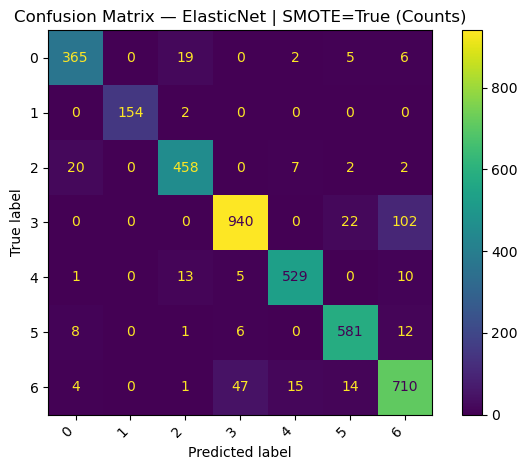

<Figure size 700x600 with 0 Axes>

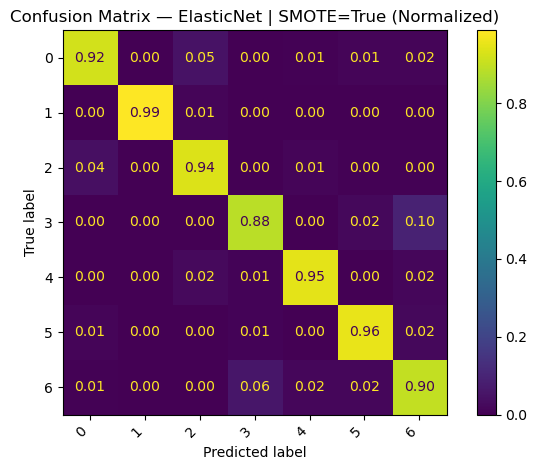

<Figure size 700x600 with 0 Axes>

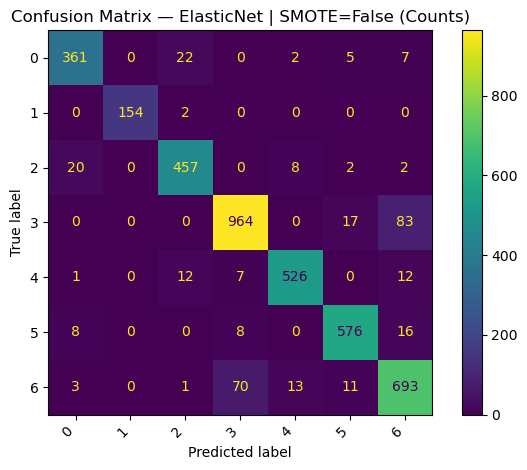

<Figure size 700x600 with 0 Axes>

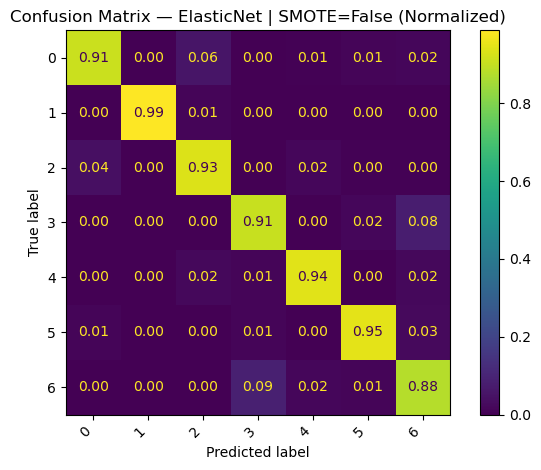

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# ============================================================
# 0) Sécurité : noms des classes
# ============================================================
if "class_names" not in globals():
    class_names = [str(c) for c in np.unique(y_test)]
    print("Warning: class_names not found -> using numeric labels:", class_names)


# ============================================================
# 1) Fonction : plot confusion matrices
# ============================================================
def plot_confusion_matrices(models_dict, X_test, y_test, class_names):
    """
    models_dict : dict {title: estimator}
    """
    labels = np.unique(y_test)

    for title, est in models_dict.items():
        y_pred = est.predict(X_test)

        # --- Counts
        cm = confusion_matrix(y_test, y_pred, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

        plt.figure(figsize=(7, 6))
        disp.plot(values_format="d", cmap="viridis")
        plt.title(f"Confusion Matrix — {title} (Counts)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

        # --- Normalized (row-wise)
        cm_norm = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")
        disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=class_names)

        plt.figure(figsize=(7, 6))
        disp_norm.plot(values_format=".2f", cmap="viridis")
        plt.title(f"Confusion Matrix — {title} (Normalized)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


# ============================================================
# 2) Exemple d’utilisation
# ============================================================
# Si tu as créé ce dict en refit (recommandé)
# elasticnet_fitted = {"ElasticNet | SMOTE=True": est1, "ElasticNet | SMOTE=False": est2}

# 👉 Remplace elasticnet_fitted par le nom exact de ton dictionnaire de modèles
plot_confusion_matrices(elasticnet_fitted, X_test, y_test, class_names)